In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('facebook_ads_data.csv')

In [4]:
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


###**Завдання 1**
Зроби групування даних по дням та для згрупованих даних побудуй два графіки:
- Графік з щоденною сумою витрат на рекламу в 2021 році;
- Графік з щоденним ROMI в 2021 році.

In [5]:
df_daily = df.groupby('ad_date', as_index=False).agg({
    'total_spend': 'sum',
    'romi': 'mean'
})
df_daily_2021 = df_daily[df_daily['ad_date'].between('2021-01-01', '2021-12-31')]

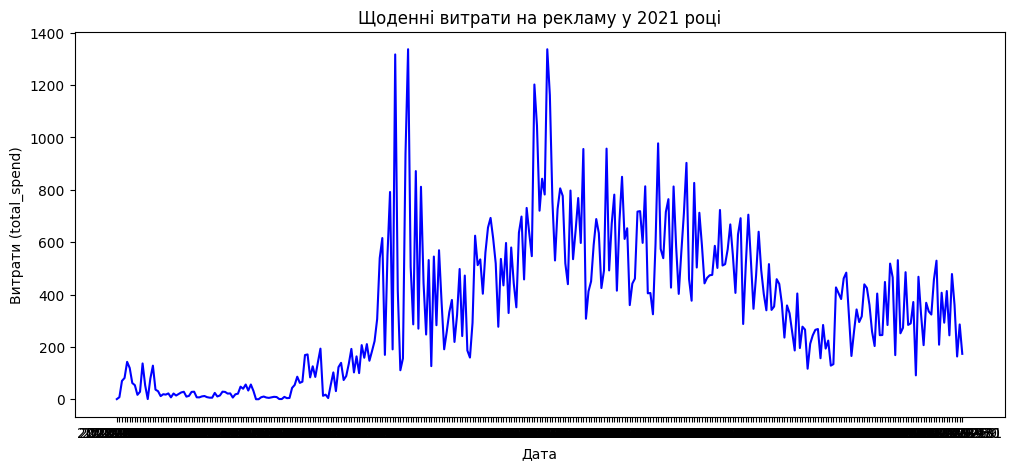

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df_daily_2021['ad_date'], df_daily_2021['total_spend'], color='blue')
plt.title('Щоденні витрати на рекламу у 2021 році')
plt.xlabel('Дата')
plt.ylabel('Витрати (total_spend)')
plt.show()

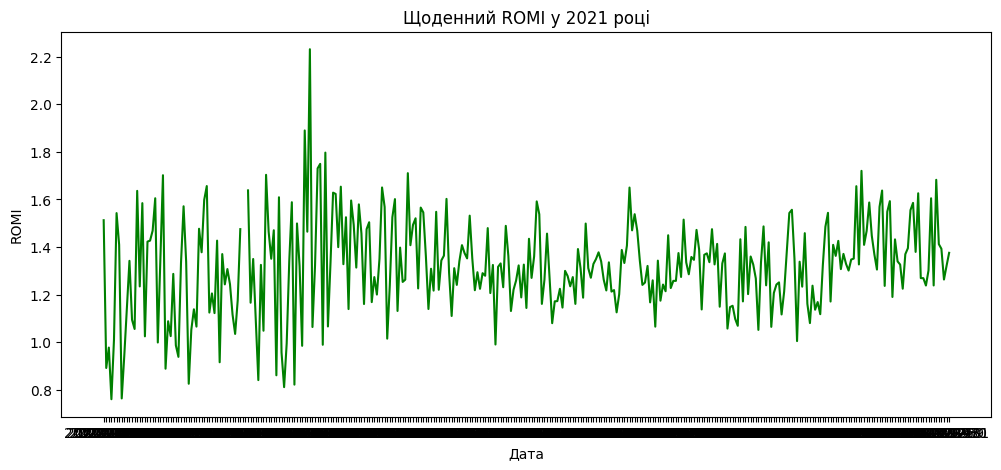

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df_daily_2021['ad_date'], df_daily_2021['romi'], color='green')
plt.title('Щоденний ROMI у 2021 році')
plt.xlabel('Дата')
plt.ylabel('ROMI')
plt.show()

###**Завдання 2**
Зроби групування даних за назвою кампанії побудуй два графіки:
- Графік загальної суми витрат на рекламу в кожній з кампаній;
- Загальний ROMI в кожній з кампаній.

In [8]:
df_campaign = df.groupby('campaign_name', as_index=False).agg({
    'total_spend': 'sum',
    'total_value': 'sum'
})

df_campaign['romi'] = (df_campaign['total_value'] - df_campaign['total_spend']) / df_campaign['total_spend']

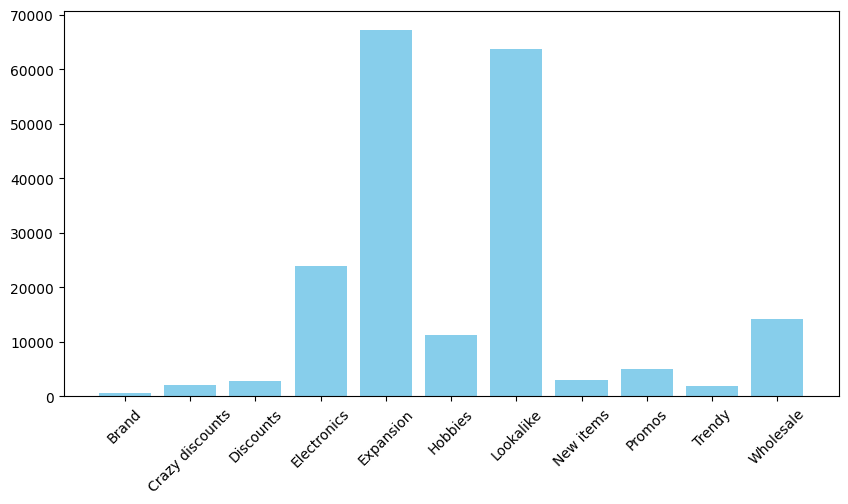

In [9]:
plt.figure(figsize=(10,5))
plt.bar(df_campaign['campaign_name'], df_campaign['total_spend'], color='skyblue')
plt.xticks(rotation=45)
plt.show()

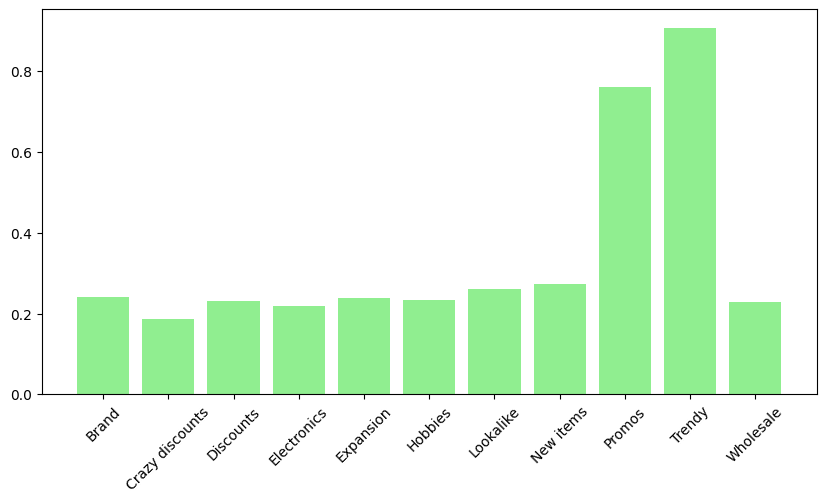

In [10]:
plt.figure(figsize=(10,5))
plt.bar(df_campaign['campaign_name'], df_campaign['romi'], color='lightgreen')
plt.xticks(rotation=45)
plt.show()

###**Завдання 3**
За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

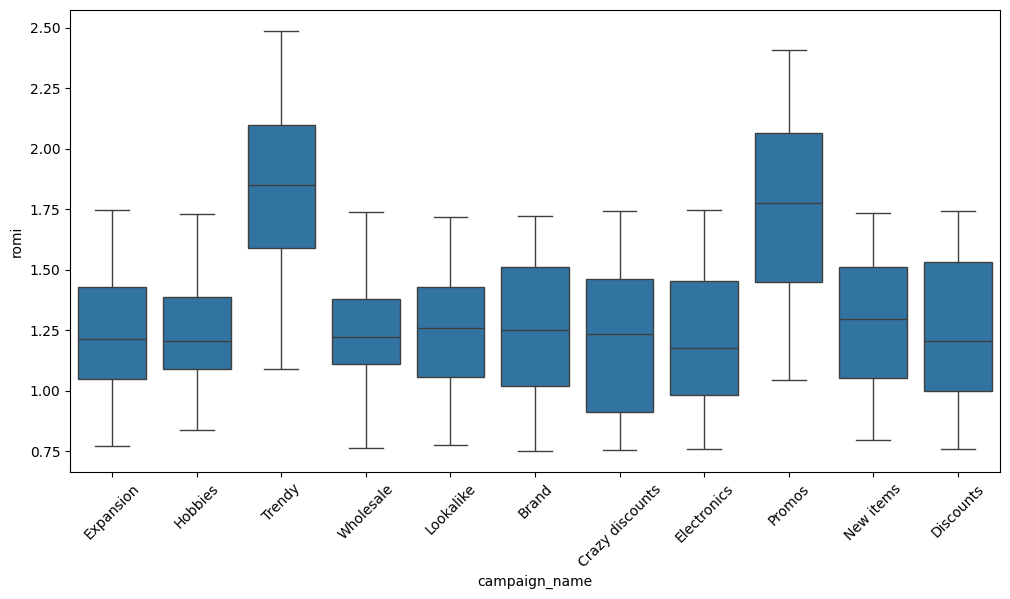

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='campaign_name', y='romi', data=df)
plt.xticks(rotation=45)
plt.show()

###**Завдання 4**
Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

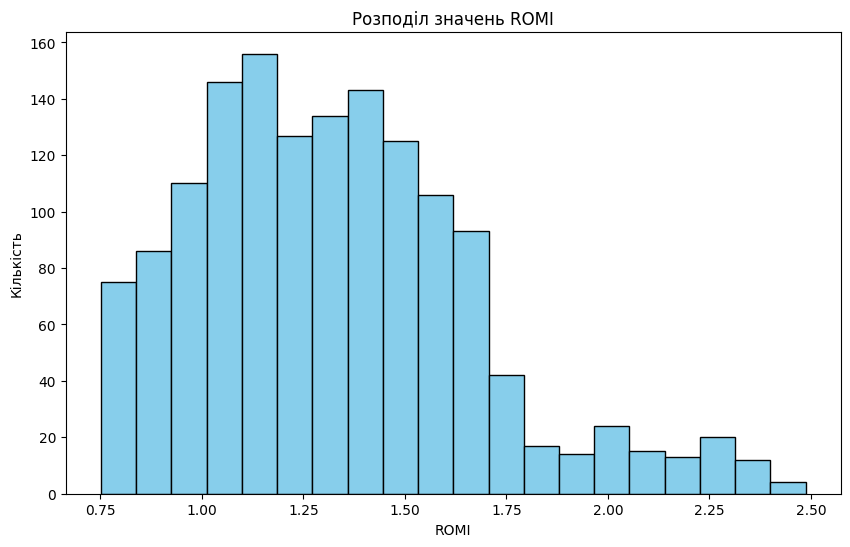

In [12]:
plt.figure(figsize=(10,6))
plt.hist(df['romi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл значень ROMI')
plt.xlabel('ROMI')
plt.ylabel('Кількість')
plt.show()

###**Завдання 5**
Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

In [13]:
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()

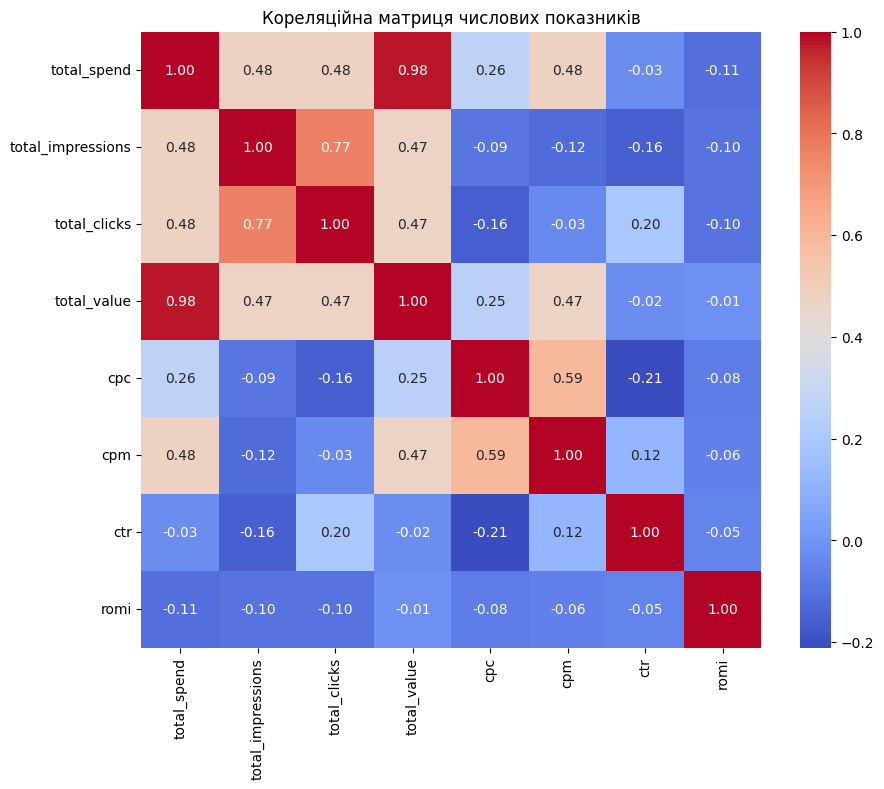

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Кореляційна матриця числових показників')
plt.show()

###**Завдання 6**
Побудуй точкову діаграму з лінійною регресією (для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.



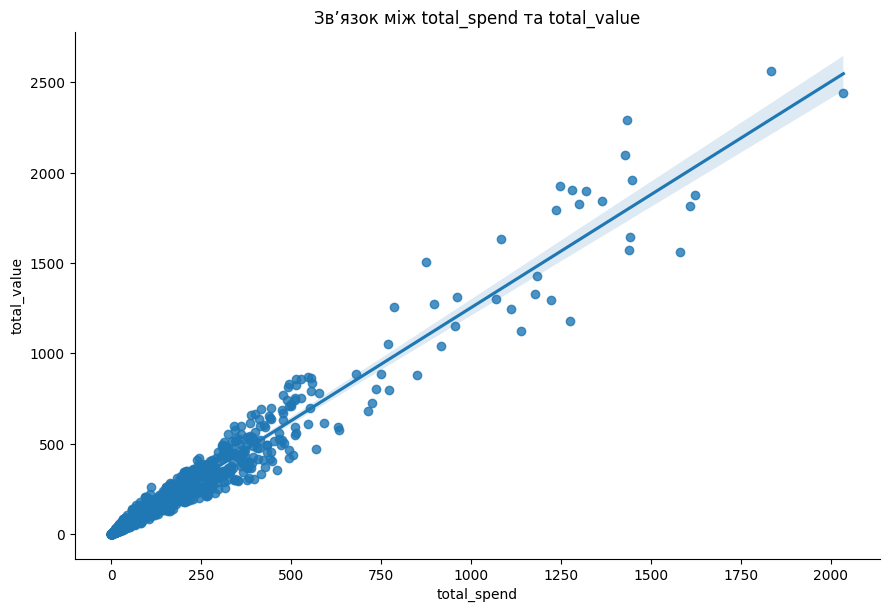

In [15]:
sns.lmplot(x='total_spend', y='total_value', data=df, height=6, aspect=1.5)
plt.title('Звʼязок між total_spend та total_value')
plt.show()